<div align="center">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.png)](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/projecte_final.ipynb)

Si no funciona el botó podeu copiar el següent [enllaç](https://colab.research.google.com/github/wisaaco/CURS_AdministracioAnaliticaAvancadaDeDades/blob/main/lessons/projecte_final.ipynb)

</div>

# Projecte final

L'objectiu d'aquest projecte és avaluar la vostra capacitat per dur a terme un projecte de _Machine Learning_. Dins del portal de dades obertes de la CAIB hem seleccionat un dataset que ofereixi flexibilitat a l’hora d’aplicar diferents algorismes i amb un temps de dedicació raonable.

Treballarem amb les dades recollides per una estació de control de qualitat de l'aire a l'Hospital Joan March de Mallorca: [dades](https://intranet.caib.es/opendatacataleg/dataset/mesuraments-estacio-control-qualitat-aire-illes-balears-estacio-hospital-joan-march-mallorca/resource/dcef6fdf-3836-4a98-92f9-e8efc2839f9c).

La informació disponible a la web sobre el seu contingut és la següent:<br/>
>>> Les concentracions dels contaminants SO2, NO, NO2, O3, PM10, PM2.5, benzè, toluè i xilè apareixen en micrograms per metre cúbic (µg/m³). <br/>
>>> Les unitats del contaminant CO són mil·ligrams per metre cúbic (mg/m³). <br/>
>>> Per a cada contaminant s’inclou un “flag” o indicador d’estat, on V significa que la dada és vàlida.<br/>


Com que trobam més columnes i no som experts en medi ambient, hem demanat a ChatGPT una mica més de descripció:<br/>
>>>
- DATA_HI, PERIODE_HI: informació temporal de les dades.<br/>
- SO2_HI, FL_SO2: concentració de diòxid de sofre (SO₂) en µg/m³ i el seu indicador d’estat.<br/>
- NO_HI, FL_NO: concentració de monòxid de nitrogen (NO) en µg/m³ i el seu indicador d’estat.<br/>
- NO2_HI, FL_NO2: concentració de diòxid de nitrogen (NO₂) en µg/m³ i el seu indicador d’estat.<br/>
- NOX_HI, FL_NOX: concentració de NOx (òxids de nitrogen) en µg/m³ i el seu indicador d’estat.<br/>
- O3_HI, FL_O3: concentració d’ozó (O₃) en µg/m³ i el seu indicador d’estat.<br/>
- PM2,5_HI, FL_PM2,5: concentració de partícules fines PM2,5 en µg/m³ i el seu indicador d’estat.<br/>
- PM10_HI, FL_PM10: concentració de partícules PM10 en µg/m³ i el seu indicador d’estat.<br/>
- DD_HI, FL_DD: direcció del vent (°) i el seu indicador d’estat.<br/>
- VV_HI, FL_VV: velocitat del vent (m/s) i el seu indicador d’estat.<br/>
- TMP_HI, FL_TMP: temperatura de l’aire (°C) i el seu indicador d’estat.<br/>
- HR_HI, FL_HR: humitat relativa (%) i el seu indicador d’estat.<br/>
- PRB_HI, FL_PRB: pressió baromètrica (hPa) i el seu indicador d’estat.<br/>
- LL_HI, FL_LL: nivell de pluja (mm) i el seu indicador d’estat.<br/>
- RS_HI, FL_RS: radiació solar (W/m²) i el seu indicador d’estat.<br/>


Si cerquem a la web, trobarem un [informe de qualitat de l'aire de les Illes Balears 2021](https://www.caib.es/sites/atmosfera/f/409181) on s'ofereix una bona explicació de les diferents estacions, així com els llindars d'avaluació i els recomanats per l'OMS per als contaminants (pàgina 9).

## Objectiu

Podeu optar per quatre enfocaments de resolució recomanats segons el grau de dificultat i el vostre temps de dedicació:<br/>
- A) (Solució de mínims) Aplicar un model de regressió lineal a alguna mètrica de contaminants (SO₂, NO, NO₂, O₃, PM₁₀, PM₂,₅...). Podeu utilitzar les mostres dels darrers dos anys i aplicar un parell de mètriques d’avaluació. <br/>
- B) (Solució de dificultat mitjana) Fer una comparativa de diferents algoritmes de regressió aplicats a diversos contaminants.<br/>
- C.A) (Solució avançada) Aplicar una xarxa neuronal per predir un contaminant específic.<br/>
- C.B) (Solució avançada) Dissenyar una variable objectiu (qualitat de l’aire: Excel·lent, Bona, Regular o Dolenta) basada en un contaminant o en un conjunt de contaminants (consulteu, per exemple, l’informe a la pàg. 10) i definir un model de classificació. Feu un petit exercici d’imaginació, ja que potser no té gaire sentit que, si disposem dels valors dels contaminants, amb una estructura if-then i els llindars establerts ja podríem categoritzar-los. Aquest enfocament resulta interessant si disposem de variables exògenes (embussos, emissions d’indústria, creuers, vagues, etc.). Acadèmicament, és interessant analitzar la qualitat del model.<br/>

**IMPORTANT**

L'objectiu no és tenir el millor model, sinó seguir un procés coherent.
No intenteu abastar massa! Hi ha moltes variables, moltes mostres, molts algorismes, etc.

### Entrega
Només necessitem que pugeu el notebook a la web de l'assignatura.

## Dades

Anem a fer una primera exploració de les dades de les que disposem:

In [ ]:
import pandas as pd
print("Pandas version: ", pd.__version__)

df = pd.read_csv("data/dcef6fdf-3836-4a98-92f9-e8efc2839f9c.csv") #aquest fitxer està disponible a l'enllaç de la CAIB però també ho adjuntem al repositori.
print(df.columns)
print("-"*50)
print(df.shape)

Pandas version:  2.2.2
Index(['_id', 'DATA_HI', 'PERIODE_HI', 'SO2_HI', 'FL_SO2', 'NO_HI', 'FL_NO',
       'NO2_HI', 'FL_NO2', 'NOX_HI', 'FL_NOX', 'O3_HI', 'FL_O3', 'PM2,5_HI',
       'FL_PM2,5', 'PM10_HI', 'FL_PM10', 'DD_HI', 'FL_DD', 'VV_HI', 'FL_VV',
       'TMP_HI', 'FL_TMP', 'HR_HI', 'FL_HR', 'PRB_HI', 'FL_PRB', 'LL_HI',
       'FL_LL', 'RS_HI', 'FL_RS'],
      dtype='object')
--------------------------------------------------
(152151, 31)


In [2]:
df.head(2)

,_id,DATA_HI,PERIODE_HI,SO2_HI,FL_SO2,NO_HI,FL_NO,NO2_HI,FL_NO2,NOX_HI,...,TMP_HI,FL_TMP,HR_HI,FL_HR,PRB_HI,FL_PRB,LL_HI,FL_LL,RS_HI,FL_RS
0,1,01/01/2011 12:00:00 AM,1.0,0.625,V,0.25,V,4.950,V,5.50,...,9.600,V,83.50,V,991,V,0.0,V,NaN,NaN
1,2,01/01/2011 12:00:00 AM,2.0,0.600,V,0.25,V,5.075,V,5.55,...,9.475,V,84.25,V,991,V,0.0,V,NaN,NaN


In [3]:
# Podem tindre una sèrie temporal
from pandas import DatetimeIndex
df.index = DatetimeIndex(df["DATA_HI"])


df.head(10)

,_id,DATA_HI,PERIODE_HI,SO2_HI,FL_SO2,NO_HI,FL_NO,NO2_HI,FL_NO2,NOX_HI,...,TMP_HI,FL_TMP,HR_HI,FL_HR,PRB_HI,FL_PRB,LL_HI,FL_LL,RS_HI,FL_RS
DATA_HI,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,01/01/2011 12:00:00 AM,1.0,0.625,V,0.250,V,4.950,V,5.500,...,9.600,V,83.50,V,991,V,0.0,V,NaN,NaN
2011-01-01,2,01/01/2011 12:00:00 AM,2.0,0.600,V,0.250,V,5.075,V,5.550,...,9.475,V,84.25,V,991,V,0.0,V,NaN,NaN
2011-01-01,3,01/01/2011 12:00:00 AM,6.0,0.650,V,0.225,V,3.025,V,3.500,...,8.775,V,88.50,V,991,V,0.0,V,NaN,NaN
2011-01-01,4,01/01/2011 12:00:00 AM,7.0,0.625,V,0.200,V,2.800,V,3.225,...,8.825,V,88.00,V,991,V,0.0,V,NaN,NaN
2011-01-01,5,01/01/2011 12:00:00 AM,17.0,0.750,V,0.200,V,2.950,V,3.350,...,10.375,V,65.25,V,990.5,V,0.0,V,NaN,NaN
2011-01-01,6,01/01/2011 12:00:00 AM,19.0,0.425,V,0.225,V,4.100,V,4.625,...,9.475,V,73.25,V,990.5,V,0.0,V,NaN,NaN
2011-01-02,7,01/02/2011 12:00:00 AM,4.0,0.750,V,0.775,V,3.150,V,4.500,...,8.375,V,86.25,V,989,V,0.0,V,NaN,NaN
2011-01-02,8,01/02/2011 12:00:00 AM,5.0,0.475,V,0.200,V,2.450,V,2.925,...,8.150,V,87.25,V,989,V,0.0,V,NaN,NaN
2011-01-02,9,01/02/2011 12:00:00 AM,8.0,0.475,V,0.250,V,2.850,V,3.325,...,8.000,V,76.00,V,989,V,0.0,V,NaN,NaN


In [4]:
df.drop(columns="DATA_HI",inplace=True)

In [5]:
df.loc["01/01/2017"].sort_values("PERIODE_HI")

,_id,PERIODE_HI,SO2_HI,FL_SO2,NO_HI,FL_NO,NO2_HI,FL_NO2,NOX_HI,FL_NOX,...,TMP_HI,FL_TMP,HR_HI,FL_HR,PRB_HI,FL_PRB,LL_HI,FL_LL,RS_HI,FL_RS
DATA_HI,,,,,,,,,,,,,,,,,,,,,
2017-01-01,105022,1.0,1.0,V,1.0,V,3.0,V,1.4,V,...,6.8,V,70.0,V,"1,000",V,0.0,V,NaN,NaN
2017-01-01,75828,2.0,1.0,V,1.0,V,3.0,V,1.0,V,...,7.3,V,67.0,V,"1,000",V,0.0,V,NaN,NaN
2017-01-01,14587,3.0,1.0,V,1.3,V,3.0,V,2.3,V,...,6.9,V,69.0,V,999,V,0.0,V,NaN,NaN
2017-01-01,75829,4.0,1.0,V,1.0,V,3.0,V,1.3,V,...,7.1,V,67.0,V,999,V,0.0,V,NaN,NaN
2017-01-01,75830,5.0,1.0,V,1.0,V,3.0,V,0.8,V,...,7.5,V,65.0,V,998,V,0.0,V,NaN,NaN
2017-01-01,75831,6.0,1.0,V,1.7,V,3.0,V,2.0,V,...,7.7,V,68.0,V,998,V,0.0,V,NaN,NaN
2017-01-01,14588,7.0,1.0,V,1.0,V,3.0,V,2.0,V,...,7.0,V,74.0,V,998,V,0.0,V,NaN,NaN
2017-01-01,105023,8.0,1.0,V,1.0,V,3.0,V,1.8,V,...,6.8,V,75.0,V,998,V,0.0,V,NaN,NaN
2017-01-01,105024,9.0,1.0,V,1.0,V,3.0,V,2.8,V,...,9.3,V,64.0,V,998,V,0.0,V,NaN,NaN


In [9]:
# LLINDARS RECOMENATS PER L’OMS
# PM10 Valor diaria 45 ug/m3

df.loc["01/01/2017"].sort_values("PERIODE_HI")["PM10_HI"]<45

DATA_HI
2017-01-01     True
2017-01-01     True
2017-01-01    False
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01    False
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
2017-01-01     True
Name: PM10_HI, dtype: bool

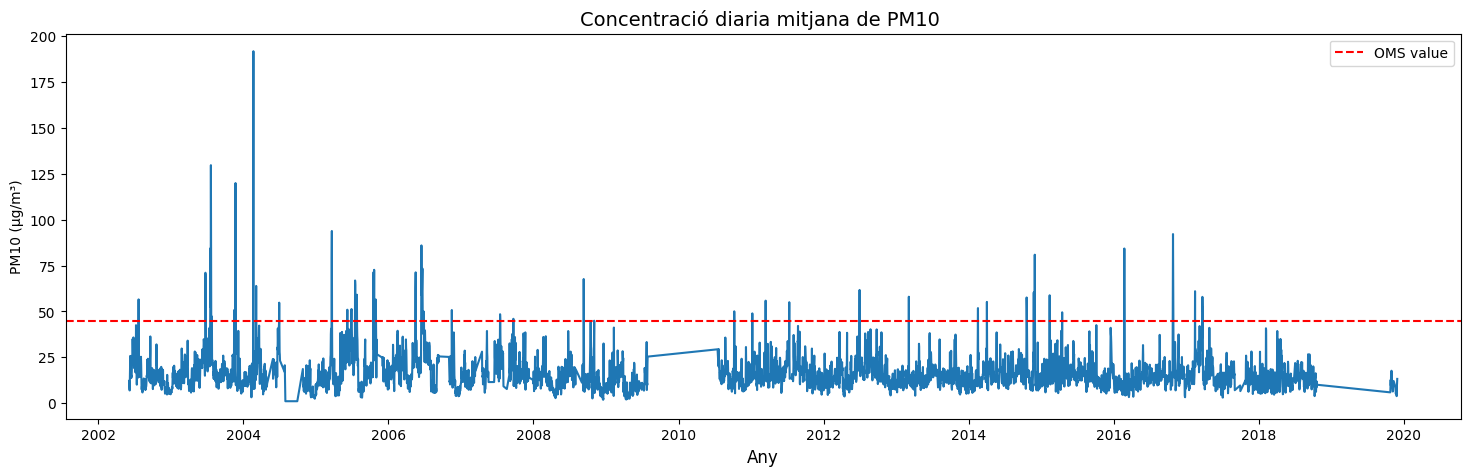

In [ ]:
# Visualització d'algun valor
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18, 5))
ax = sns.lineplot(ax=ax,data=df.groupby(df.index).mean(numeric_only=True),x="DATA_HI",y="PM10_HI")
ax.axhline(y = 45, color = 'r', linestyle = 'dashed', label = "OMS value")    #45 és el valor llindar per a aquesta partícula a nivell DIARI. Nota: hem suposat que és el valor mitjà.
plt.title("Concentració diaria mitjana de PM10 ", fontsize=14) # Maquetació
plt.xlabel('Any', fontsize=12)
plt.ylabel('PM10 (µg/m³)')
plt.legend(loc = 'upper right') 


In [18]:
## Aqui comença la vostra feina

[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Authors: [Isaac Lera](https://personal.uib.cat/isaac.lera), [Miquel Miró](https://personal.uib.cat/miquel.miro) and [Biel Moyà](https://personal.uib.cat/gabriel.moya)<br/>
Institution: Universitat de les Illes Balears (UIB) <br/>